In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv('C:/Users/saide/Desktop/study/python_upskill/ml_algorithms/house_price.csv')

In [16]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [17]:
df = df.drop_duplicates()
df = df.fillna(df.median(numeric_only=True))
df = df.select_dtypes(include=[np.number])

In [18]:
target_col = "House_Price"  
X = df.drop(columns=[target_col])
y = df[target_col]

In [19]:
df

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06
...,...,...,...,...,...,...,...,...
995,3261,4,1,1978,2.165110,2,10,7.014940e+05
996,3179,1,2,1999,2.977123,1,10,6.837232e+05
997,2606,4,2,1962,4.055067,0,2,5.720240e+05
998,4723,5,2,1950,1.930921,0,7,9.648653e+05


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [8]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, n_iters=3000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None
        self.loss_history = []
    def fit(self, X, y):
        X = np.array(X, dtype=float)
        y = np.array(y, dtype=float).reshape(-1)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0.0
        for _ in range(self.n_iters):
            y_pred = np.dot(X, self.weights) + self.bias
            error = (y_pred - y)
            dw = (2 / n_samples) * np.dot(X.T, error)
            db = (2 / n_samples) * np.sum(error)
            self.weights -= self.lr * dw
            self.bias -= self.lr * db
            loss = np.mean(error ** 2)
            self.loss_history.append(loss)
    def predict(self, X):
        X = np.array(X, dtype=float)
        return np.dot(X, self.weights) + self.bias
    

In [9]:
lin_reg = LinearRegressionScratch(lr=0.01, n_iters=4000)
lin_reg.fit(X_train_scaled, y_train.values)
y_pred_lr = lin_reg.predict(X_test_scaled)

In [10]:
mse = mean_squared_error(y_test, y_pred_lr)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

In [11]:
print("MSE:", mse)
print("RMSE:", rmse)
print("MAE:", mae)
print("R2:", r2)

MSE: 101434798.5056371
RMSE: 10071.484424137143
MAE: 8174.583600006683
R2: 0.9984263636823413


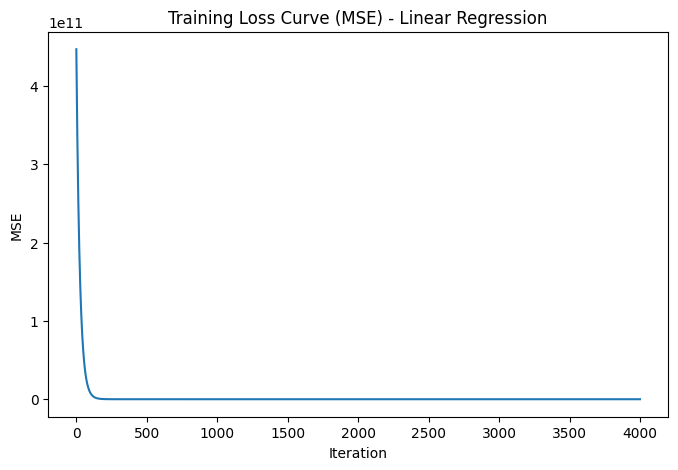

In [12]:
plt.figure(figsize=(8, 5))
plt.plot(lin_reg.loss_history)
plt.title("Training Loss Curve (MSE) - Linear Regression")
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.show()

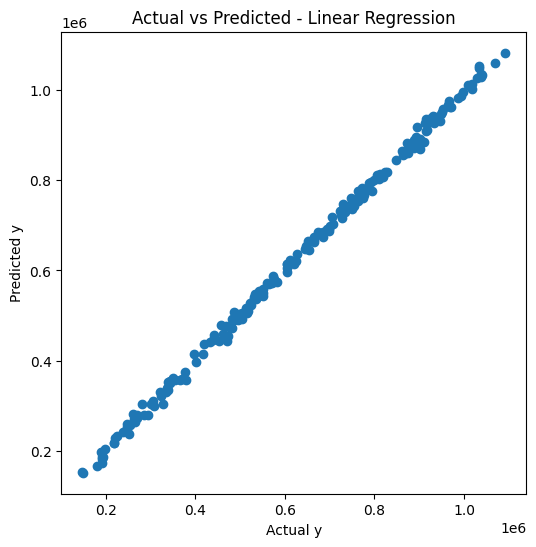

In [13]:
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_lr)
plt.title("Actual vs Predicted - Linear Regression")
plt.xlabel("Actual y")
plt.ylabel("Predicted y")
plt.show()


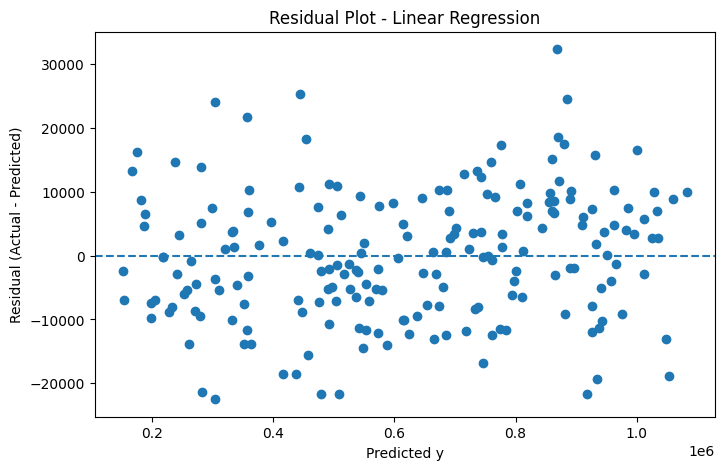

In [14]:
residuals = y_test.values - y_pred_lr
plt.figure(figsize=(8, 5))
plt.scatter(y_pred_lr, residuals)
plt.axhline(0, linestyle='--')
plt.title("Residual Plot - Linear Regression")
plt.xlabel("Predicted y")
plt.ylabel("Residual (Actual - Predicted)")
plt.show()

In [15]:
lr_results = pd.DataFrame([{
    "Model": "Linear Regression (Scratch)",
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R2": r2
}])
lr_results

,Model,MSE,RMSE,MAE,R2
0,Linear Regression (Scratch),1.014348e+08,10071.484424,8174.5836,0.998426


In [20]:
from sklearn.linear_model import LinearRegression

sk_model = LinearRegression()
sk_model.fit(X_train_scaled, y_train)
sk_pred = sk_model.predict(X_test_scaled)

print("Sklearn R2:", r2_score(y_test, sk_pred))
print("Scratch R2 :", r2)


Sklearn R2: 0.9984263636823413
Scratch R2 : 0.9984263636823413
